# Установка зависимостей

1. Ставим yfinance, так как она не входит в пакет анаконды

In [519]:
!pip install yfinance

In [521]:
# Импортируем нужные нам библиотеки
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [523]:
# Загрузка списка компаний S&P 500
def get_snp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    table = pd.read_html(url)
    df = table[0]
    return df['Symbol'].tolist(), df

# Скачивание данных о котировках
def download_stock_data(tickers_to_downdload):
    print(tickers_to_downdload)
    data = yf.download(tickers_to_downdload, period="1y", interval="1d", threads=True)
    # group_by='ticker'
    return data

In [508]:
# Загружаем список ценных бумаг из Wiki
tickers, snp500_df = get_snp500_tickers()

In [509]:
tickers[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [200]:
snp500_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [696]:
# Если загружать все, то notebook потребляет очень много памяти, работать почти невозможно. Возмем для примера только некоторые из ценных бумаг
test_tickers = ['AAPL', 'GOOG','AMZN', 'MSFT', 'AMD', 'NVDA', 'IBM']

In [700]:
# Получение данных о котировках
stock_data = download_stock_data(test_tickers)  
# Сохраняем данные на будущее, чтобы не качать каждый раз из интернета
stock_data.to_csv('snp500_stock_data.csv')


Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'GOOG' reason: Expecting value: line 1 column 1 (char 0)


['AAPL', 'GOOG', 'AMZN', 'MSFT', 'AMD', 'NVDA', 'IBM']


[*********************100%***********************]  7 of 7 completed


In [702]:
stock_data.head()

Price                       Adj Close                                      \
Ticker                           AAPL         AMD        AMZN        GOOG   
Date                                                                        
2023-11-24 00:00:00+00:00  189.043869  122.309998  146.740005  137.881378   
2023-11-27 00:00:00+00:00  188.864731  122.650002  147.729996  137.711807   
2023-11-28 00:00:00+00:00  189.471756  122.010002  147.029999  138.280396   
2023-11-29 00:00:00+00:00  188.446808  123.849998  146.320007  136.065842   
2023-11-30 00:00:00+00:00  189.023972  121.160004  146.089996  133.591919   

Price                                                              Close  \
Ticker                            IBM        MSFT       NVDA        AAPL   
Date                                                                       
2023-11-24 00:00:00+00:00  149.765961  374.628571  47.761551  189.970001   
2023-11-27 00:00:00+00:00  150.142365  375.799805  48.227406  189.789993   
2023-11-28 00:00:00+00:00  150.219559  379.859467  47.806534  190.399994   
2023-11-29 00:00:00+00:00  150.953049  376.038025  48.125439  189.369995   
2023-11-30 00:00:00+00:00  153.028046  376.097595  46.755852  189.949997   

Price                                              ...        Open  \
Ticker                            AMD        AMZN  ...         IBM   
Date                                               ...               
2023-11-24 00:00:00+00:00  122.309998  146.740005  ...  155.130005   
2023-11-27 00:00:00+00:00  122.650002  147.729996  ...  154.990005   
2023-11-28 00:00:00+00:00  122.010002  147.029999  ...  155.440002   
2023-11-29 00:00:00+00:00  123.849998  146.320007  ...  156.149994   
2023-11-30 00:00:00+00:00  121.160004  146.089996  ...  156.949997   

Price                                               Volume            \
Ticker                           MSFT       NVDA      AAPL       AMD   
Date                                                                   
2023-11-24 00:00:00+00:00  377.329987  48.470001  24048300  19001000   
2023-11-27 00:00:00+00:00  376.779999  47.799999  40552600  32743000   
2023-11-28 00:00:00+00:00  378.350006  48.236000  38415400  32047100   
2023-11-29 00:00:00+00:00  383.760010  48.379002  43014200  37876300   
2023-11-30 00:00:00+00:00  378.489990  48.023998  48794400  44494200   

Price                                                                        
Ticker                         AMZN      GOOG      IBM      MSFT       NVDA  
Date                                                                         
2023-11-24 00:00:00+00:00  22378400   8828600  1799200  10176600  294645000  
2023-11-27 00:00:00+00:00  53762400  17886400  4053100  22179200  395662000  
2023-11-28 00:00:00+00:00  42711700  17046900  2666200  20453100  401491000  
2023-11-29 00:00:00+00:00  40610900  21014700  3568900  28963400  382005000  
2023-11-30 00:00:00+00:00  65814000  29913500  6740600  30554400  526247000  

[5 rows x 42 columns]

In [745]:
# Загружаем данные из CSV
df = pd.read_csv('snp500_stock_data.csv', header=[0, 1], index_col=0)
df.columns.names = ['Price', 'Date'] # Переименовываем индексное поле из Ticker в Date
df.index = pd.to_datetime(df.index)
df.head()


Price                       Adj Close                                      \
Date                             AAPL         AMD        AMZN        GOOG   
Date                                                                        
2023-11-24 00:00:00+00:00  189.043869  122.309998  146.740005  137.881378   
2023-11-27 00:00:00+00:00  188.864731  122.650002  147.729996  137.711807   
2023-11-28 00:00:00+00:00  189.471756  122.010002  147.029999  138.280396   
2023-11-29 00:00:00+00:00  188.446808  123.849998  146.320007  136.065842   
2023-11-30 00:00:00+00:00  189.023972  121.160004  146.089996  133.591919   

Price                                                              Close  \
Date                              IBM        MSFT       NVDA        AAPL   
Date                                                                       
2023-11-24 00:00:00+00:00  149.765961  374.628571  47.761551  189.970001   
2023-11-27 00:00:00+00:00  150.142365  375.799805  48.227406  189.789993   
2023-11-28 00:00:00+00:00  150.219559  379.859467  47.806534  190.399994   
2023-11-29 00:00:00+00:00  150.953049  376.038025  48.125439  189.369995   
2023-11-30 00:00:00+00:00  153.028046  376.097595  46.755852  189.949997   

Price                                              ...        Open  \
Date                              AMD        AMZN  ...         IBM   
Date                                               ...               
2023-11-24 00:00:00+00:00  122.309998  146.740005  ...  155.130005   
2023-11-27 00:00:00+00:00  122.650002  147.729996  ...  154.990005   
2023-11-28 00:00:00+00:00  122.010002  147.029999  ...  155.440002   
2023-11-29 00:00:00+00:00  123.849998  146.320007  ...  156.149994   
2023-11-30 00:00:00+00:00  121.160004  146.089996  ...  156.949997   

Price                                               Volume            \
Date                             MSFT       NVDA      AAPL       AMD   
Date                                                                   
2023-11-24 00:00:00+00:00  377.329987  48.470001  24048300  19001000   
2023-11-27 00:00:00+00:00  376.779999  47.799999  40552600  32743000   
2023-11-28 00:00:00+00:00  378.350006  48.236000  38415400  32047100   
2023-11-29 00:00:00+00:00  383.760010  48.379002  43014200  37876300   
2023-11-30 00:00:00+00:00  378.489990  48.023998  48794400  44494200   

Price                                                                        
Date                           AMZN      GOOG      IBM      MSFT       NVDA  
Date                                                                         
2023-11-24 00:00:00+00:00  22378400   8828600  1799200  10176600  294645000  
2023-11-27 00:00:00+00:00  53762400  17886400  4053100  22179200  395662000  
2023-11-28 00:00:00+00:00  42711700  17046900  2666200  20453100  401491000  
2023-11-29 00:00:00+00:00  40610900  21014700  3568900  28963400  382005000  
2023-11-30 00:00:00+00:00  65814000  29913500  6740600  30554400  526247000  

[5 rows x 42 columns]

In [747]:
# Проводим первичный анализ
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-11-24 00:00:00+00:00 to 2024-11-22 00:00:00+00:00
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  252 non-null    float64
 1   (Adj Close, AMD)   252 non-null    float64
 2   (Adj Close, AMZN)  252 non-null    float64
 3   (Adj Close, GOOG)  252 non-null    float64
 4   (Adj Close, IBM)   252 non-null    float64
 5   (Adj Close, MSFT)  252 non-null    float64
 6   (Adj Close, NVDA)  252 non-null    float64
 7   (Close, AAPL)      252 non-null    float64
 8   (Close, AMD)       252 non-null    float64
 9   (Close, AMZN)      252 non-null    float64
 10  (Close, GOOG)      252 non-null    float64
 11  (Close, IBM)       252 non-null    float64
 12  (Close, MSFT)      252 non-null    float64
 13  (Close, NVDA)      252 non-null    float64
 14  (High, AAPL)       252 non-null    float64
 15  (High, AMD)        252 no

In [749]:
# Все колонки имеют нужный тип

In [751]:
df.isna().sum() # Проверяем нет ли NULLов

Price      Date
Adj Close  AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Close      AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
High       AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Low        AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Open       AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Volume     AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
dtype: int64

In [753]:
# Провряем есть ли пропуски в датах
expected_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
missing_dates = expected_dates.difference(df.index)

In [755]:
missing_dates

DatetimeIndex(['2023-11-25 00:00:00+00:00', '2023-11-26 00:00:00+00:00',
               '2023-12-02 00:00:00+00:00', '2023-12-03 00:00:00+00:00',
               '2023-12-09 00:00:00+00:00', '2023-12-10 00:00:00+00:00',
               '2023-12-16 00:00:00+00:00', '2023-12-17 00:00:00+00:00',
               '2023-12-23 00:00:00+00:00', '2023-12-24 00:00:00+00:00',
               ...
               '2024-10-19 00:00:00+00:00', '2024-10-20 00:00:00+00:00',
               '2024-10-26 00:00:00+00:00', '2024-10-27 00:00:00+00:00',
               '2024-11-02 00:00:00+00:00', '2024-11-03 00:00:00+00:00',
               '2024-11-09 00:00:00+00:00', '2024-11-10 00:00:00+00:00',
               '2024-11-16 00:00:00+00:00', '2024-11-17 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=113, freq=None)

In [757]:
# Скорее всего это выходные биржи, добавим их в DF
df = df.reindex(expected_dates)
df.head()

Price                       Adj Close                                      \
Date                             AAPL         AMD        AMZN        GOOG   
2023-11-24 00:00:00+00:00  189.043869  122.309998  146.740005  137.881378   
2023-11-25 00:00:00+00:00         NaN         NaN         NaN         NaN   
2023-11-26 00:00:00+00:00         NaN         NaN         NaN         NaN   
2023-11-27 00:00:00+00:00  188.864731  122.650002  147.729996  137.711807   
2023-11-28 00:00:00+00:00  189.471756  122.010002  147.029999  138.280396   

Price                                                              Close  \
Date                              IBM        MSFT       NVDA        AAPL   
2023-11-24 00:00:00+00:00  149.765961  374.628571  47.761551  189.970001   
2023-11-25 00:00:00+00:00         NaN         NaN        NaN         NaN   
2023-11-26 00:00:00+00:00         NaN         NaN        NaN         NaN   
2023-11-27 00:00:00+00:00  150.142365  375.799805  48.227406  189.789993   
2023-11-28 00:00:00+00:00  150.219559  379.859467  47.806534  190.399994   

Price                                              ...        Open  \
Date                              AMD        AMZN  ...         IBM   
2023-11-24 00:00:00+00:00  122.309998  146.740005  ...  155.130005   
2023-11-25 00:00:00+00:00         NaN         NaN  ...         NaN   
2023-11-26 00:00:00+00:00         NaN         NaN  ...         NaN   
2023-11-27 00:00:00+00:00  122.650002  147.729996  ...  154.990005   
2023-11-28 00:00:00+00:00  122.010002  147.029999  ...  155.440002   

Price                                                 Volume              \
Date                             MSFT       NVDA        AAPL         AMD   
2023-11-24 00:00:00+00:00  377.329987  48.470001  24048300.0  19001000.0   
2023-11-25 00:00:00+00:00         NaN        NaN         NaN         NaN   
2023-11-26 00:00:00+00:00         NaN        NaN         NaN         NaN   
2023-11-27 00:00:00+00:00  376.779999  47.799999  40552600.0  32743000.0   
2023-11-28 00:00:00+00:00  378.350006  48.236000  38415400.0  32047100.0   

Price                                                                     \
Date                             AMZN        GOOG        IBM        MSFT   
2023-11-24 00:00:00+00:00  22378400.0   8828600.0  1799200.0  10176600.0   
2023-11-25 00:00:00+00:00         NaN         NaN        NaN         NaN   
2023-11-26 00:00:00+00:00         NaN         NaN        NaN         NaN   
2023-11-27 00:00:00+00:00  53762400.0  17886400.0  4053100.0  22179200.0   
2023-11-28 00:00:00+00:00  42711700.0  17046900.0  2666200.0  20453100.0   

Price                                   
Date                              NVDA  
2023-11-24 00:00:00+00:00  294645000.0  
2023-11-25 00:00:00+00:00          NaN  
2023-11-26 00:00:00+00:00          NaN  
2023-11-27 00:00:00+00:00  395662000.0  
2023-11-28 00:00:00+00:00  401491000.0  

[5 rows x 42 columns]

In [759]:
# Заполним их данныхми из предыдущего доступного дня
df.ffill(inplace=True)
df

Price                       Adj Close                                      \
Date                             AAPL         AMD        AMZN        GOOG   
2023-11-24 00:00:00+00:00  189.043869  122.309998  146.740005  137.881378   
2023-11-25 00:00:00+00:00  189.043869  122.309998  146.740005  137.881378   
2023-11-26 00:00:00+00:00  189.043869  122.309998  146.740005  137.881378   
2023-11-27 00:00:00+00:00  188.864731  122.650002  147.729996  137.711807   
2023-11-28 00:00:00+00:00  189.471756  122.010002  147.029999  138.280396   
...                               ...         ...         ...         ...   
2024-11-18 00:00:00+00:00  228.020004  138.929993  201.699997  176.800003   
2024-11-19 00:00:00+00:00  228.279999  139.389999  204.610001  179.580002   
2024-11-20 00:00:00+00:00  229.000000  137.600006  202.880005  177.330002   
2024-11-21 00:00:00+00:00  228.520004  137.490005  198.380005  169.240005   
2024-11-22 00:00:00+00:00  229.869995  138.350006  197.119995  166.570007   

Price                                                               Close  \
Date                              IBM        MSFT        NVDA        AAPL   
2023-11-24 00:00:00+00:00  149.765961  374.628571   47.761551  189.970001   
2023-11-25 00:00:00+00:00  149.765961  374.628571   47.761551  189.970001   
2023-11-26 00:00:00+00:00  149.765961  374.628571   47.761551  189.970001   
2023-11-27 00:00:00+00:00  150.142365  375.799805   48.227406  189.789993   
2023-11-28 00:00:00+00:00  150.219559  379.859467   47.806534  190.399994   
...                               ...         ...         ...         ...   
2024-11-18 00:00:00+00:00  208.089996  414.929474  140.149994  228.020004   
2024-11-19 00:00:00+00:00  210.250000  416.955414  147.009995  228.279999   
2024-11-20 00:00:00+00:00  214.600006  414.659973  145.889999  229.000000   
2024-11-21 00:00:00+00:00  222.399994  412.869995  146.669998  228.520004   
2024-11-22 00:00:00+00:00  222.970001  417.000000  141.949997  229.869995   

Price                                              ...        Open  \
Date                              AMD        AMZN  ...         IBM   
2023-11-24 00:00:00+00:00  122.309998  146.740005  ...  155.130005   
2023-11-25 00:00:00+00:00  122.309998  146.740005  ...  155.130005   
2023-11-26 00:00:00+00:00  122.309998  146.740005  ...  155.130005   
2023-11-27 00:00:00+00:00  122.650002  147.729996  ...  154.990005   
2023-11-28 00:00:00+00:00  122.010002  147.029999  ...  155.440002   
...                               ...         ...  ...         ...   
2024-11-18 00:00:00+00:00  138.929993  201.699997  ...  207.000000   
2024-11-19 00:00:00+00:00  139.389999  204.610001  ...  206.500000   
2024-11-20 00:00:00+00:00  137.600006  202.880005  ...  211.000000   
2024-11-21 00:00:00+00:00  137.490005  198.380005  ...  215.809998   
2024-11-22 00:00:00+00:00  138.350006  197.119995  ...  223.350006   

Price                                                  Volume              \
Date                             MSFT        NVDA        AAPL         AMD   
2023-11-24 00:00:00+00:00  377.329987   48.470001  24048300.0  19001000.0   
2023-11-25 00:00:00+00:00  377.329987   48.470001  24048300.0  19001000.0   
2023-11-26 00:00:00+00:00  377.329987   48.470001  24048300.0  19001000.0   
2023-11-27 00:00:00+00:00  376.779999   47.799999  40552600.0  32743000.0   
2023-11-28 00:00:00+00:00  378.350006   48.236000  38415400.0  32047100.0   
...                               ...         ...         ...         ...   
2024-11-18 00:00:00+00:00  414.869995  139.500000  44686000.0  38782400.0   
2024-11-19 00:00:00+00:00  413.109985  141.320007  36211800.0  23131400.0   
2024-11-20 00:00:00+00:00  416.869995  147.410004  35169600.0  28843100.0   
2024-11-21 00:00:00+00:00  419.500000  149.350006  42108300.0  29311400.0   
2024-11-22 00:00:00+00:00  411.369995  145.929993  38153300.0  21742700.0   

Price                                                                     \
Date   

In [761]:
# Построим диаграмму
adj_close_df = df['Adj Close']

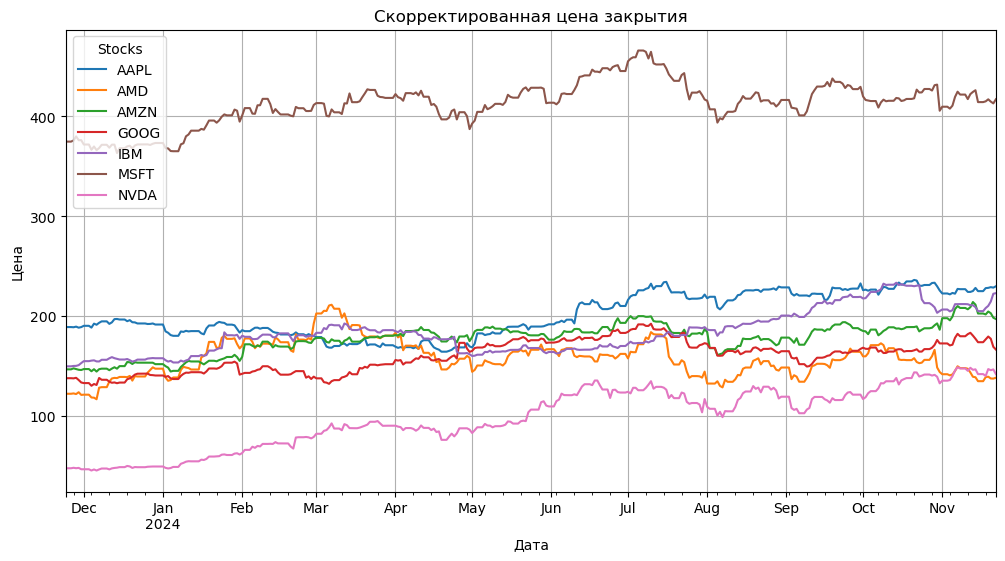

In [763]:
adj_close_df.plot(figsize=(12, 6), title="Скорректированная цена закрытия")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.legend(title="Stocks", loc="upper left")
plt.show()

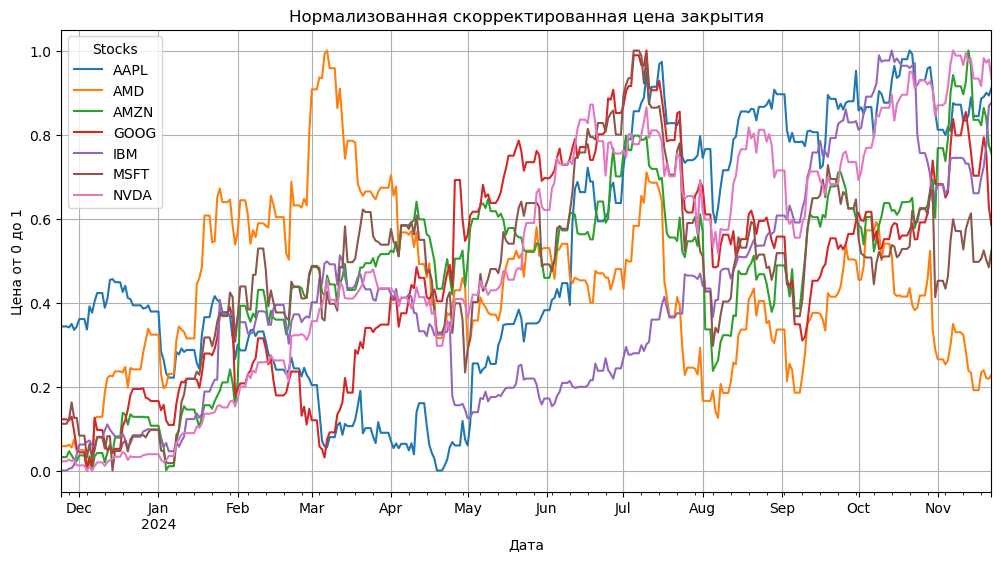

In [765]:
# Нормализуем цену

scaler = MinMaxScaler()
scaled_adj_close = pd.DataFrame(
    scaler.fit_transform(adj_close_df),
    columns=adj_close_df.columns,
    index=adj_close_df.index
)


# Plot the scaled data
scaled_adj_close.plot(figsize=(12, 6), title="Нормализованная скорректированная цена закрытия")
plt.xlabel("Дата")
plt.ylabel("Цена от 0 до 1")
plt.grid(True)
plt.legend(title="Stocks", loc="upper left")
plt.show()

In [767]:
# Ищем выбросы
# Вычисление среднего и стандартного отклонения
mean = scaled_adj_close.mean()
std = scaled_adj_close.std()

# Границы для выбросов
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Фильтрация выбросов
outliers = scaled_adj_close[(scaled_adj_close < lower_bound) | (scaled_adj_close > upper_bound)] # Значения внутри окна должны остаться NULL, а выборосы != NULL

outliers.isna().sum()

Date
AAPL    365
AMD     365
AMZN    365
GOOG    365
IBM     365
MSFT    365
NVDA    365
dtype: int64

In [769]:
# Выбросов по значениям, выходящим за пределы [mean +- 3 * std] не найдено, так как после фильтрации все значения NULL

# Анализ криптовалют

In [772]:
crypto_data = download_stock_data(['BTC-USD', 'ETH-USD', 'SOL-USD', 'XRP-USD'])  

['BTC-USD', 'ETH-USD', 'SOL-USD', 'XRP-USD']


[*********************100%***********************]  4 of 4 completed


In [774]:
crypto_data.head()

Price                         Adj Close                                    \
Ticker                          BTC-USD      ETH-USD    SOL-USD   XRP-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  37289.621094  2062.210693  56.599369  0.620242   
2023-11-24 00:00:00+00:00  37720.281250  2081.152100  56.866440  0.621881   
2023-11-25 00:00:00+00:00  37796.792969  2084.413086  58.846489  0.623444   
2023-11-26 00:00:00+00:00  37479.121094  2063.286133  57.642700  0.616819   
2023-11-27 00:00:00+00:00  37254.167969  2027.417358  55.064621  0.604153   

Price                             Close                                    \
Ticker                          BTC-USD      ETH-USD    SOL-USD   XRP-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  37289.621094  2062.210693  56.599369  0.620242   
2023-11-24 00:00:00+00:00  37720.281250  2081.152100  56.866440  0.621881   
2023-11-25 00:00:00+00:00  37796.792969  2084.413086  58.846489  0.623444   
2023-11-26 00:00:00+00:00  37479.121094  2063.286133  57.642700  0.616819   
2023-11-27 00:00:00+00:00  37254.167969  2027.417358  55.064621  0.604153   

Price                              High               ...        Low  \
Ticker                          BTC-USD      ETH-USD  ...    SOL-USD   
Date                                                  ...              
2023-11-23 00:00:00+00:00  37643.917969  2088.031982  ...  56.287563   
2023-11-24 00:00:00+00:00  38415.339844  2132.481201  ...  56.349091   
2023-11-25 00:00:00+00:00  37892.429688  2091.342773  ...  56.325279   
2023-11-26 00:00:00+00:00  37820.300781  2094.095947  ...  56.511456   
2023-11-27 00:00:00+00:00  37559.355469  2070.606201  ...  53.714470   

Price                                        Open                          \
Ticker                      XRP-USD       BTC-USD      ETH-USD    SOL-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  0.607326  37420.433594  2063.905518  57.578018   
2023-11-24 00:00:00+00:00  0.617526  37296.316406  2062.411865  56.578892   
2023-11-25 00:00:00+00:00  0.616927  37721.414062  2081.296143  56.866287   
2023-11-26 00:00:00+00:00  0.612424  37796.828125  2084.177490  58.845421   
2023-11-27 00:00:00+00:00  0.596738  37454.191406  2062.390869  57.628868   

Price                                     Volume                           \
Ticker                      XRP-USD      BTC-USD      ETH-USD     SOL-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  0.611860  14214948217   7828437946  1379316733   
2023-11-24 00:00:00+00:00  0.620250  22922957823  12141148820  1146346831   
2023-11-25 00:00:00+00:00  0.621858   9099571165   5362623390  1183793273   
2023-11-26 00:00:00+00:00  0.623452  13744796068   8054814154   871154750   
2023-11-27 00:00:00+00:00  0.616747  19002925720  10574810069  1237763215   

Price                                  
Ticker                        XRP-USD  
Date                                   
2023-11-23 00:00:00+00:00  1233580691  
2023-11-24 00:00:00+00:00  1220784875  
2023-11-25 00:00:00+00:00   604505841  
2023-11-26 00:00:00+00:00  1126158902  
2023-11-27 00:00:00+00:00  1209304147  

[5 rows x 24 columns]

In [729]:
crypto_data.to_csv('crypto_data.csv')

In [778]:
# Загружаем данные из CSV
crypto_df = pd.read_csv('crypto_data.csv', header=[0, 1], index_col=0)
crypto_df.columns.names = ['Price', 'Date'] # Переименовываем индексное поле из Ticker в Date
crypto_df.index = pd.to_datetime(crypto_df.index)
crypto_df.head()

Price                         Adj Close                                    \
Date                            BTC-USD      ETH-USD    SOL-USD   XRP-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  37289.621094  2062.210693  56.599369  0.620242   
2023-11-24 00:00:00+00:00  37720.281250  2081.152100  56.866440  0.621881   
2023-11-25 00:00:00+00:00  37796.792969  2084.413086  58.846489  0.623444   
2023-11-26 00:00:00+00:00  37479.121094  2063.286133  57.642700  0.616819   
2023-11-27 00:00:00+00:00  37254.167969  2027.417358  55.064621  0.604153   

Price                             Close                                    \
Date                            BTC-USD      ETH-USD    SOL-USD   XRP-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  37289.621094  2062.210693  56.599369  0.620242   
2023-11-24 00:00:00+00:00  37720.281250  2081.152100  56.866440  0.621881   
2023-11-25 00:00:00+00:00  37796.792969  2084.413086  58.846489  0.623444   
2023-11-26 00:00:00+00:00  37479.121094  2063.286133  57.642700  0.616819   
2023-11-27 00:00:00+00:00  37254.167969  2027.417358  55.064621  0.604153   

Price                              High               ...        Low  \
Date                            BTC-USD      ETH-USD  ...    SOL-USD   
Date                                                  ...              
2023-11-23 00:00:00+00:00  37643.917969  2088.031982  ...  56.287563   
2023-11-24 00:00:00+00:00  38415.339844  2132.481201  ...  56.349091   
2023-11-25 00:00:00+00:00  37892.429688  2091.342773  ...  56.325279   
2023-11-26 00:00:00+00:00  37820.300781  2094.095947  ...  56.511456   
2023-11-27 00:00:00+00:00  37559.355469  2070.606201  ...  53.714470   

Price                                        Open                          \
Date                        XRP-USD       BTC-USD      ETH-USD    SOL-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  0.607326  37420.433594  2063.905518  57.578018   
2023-11-24 00:00:00+00:00  0.617526  37296.316406  2062.411865  56.578892   
2023-11-25 00:00:00+00:00  0.616927  37721.414062  2081.296143  56.866287   
2023-11-26 00:00:00+00:00  0.612424  37796.828125  2084.177490  58.845421   
2023-11-27 00:00:00+00:00  0.596738  37454.191406  2062.390869  57.628868   

Price                                     Volume                           \
Date                        XRP-USD      BTC-USD      ETH-USD     SOL-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  0.611860  14214948217   7828437946  1379316733   
2023-11-24 00:00:00+00:00  0.620250  22922957823  12141148820  1146346831   
2023-11-25 00:00:00+00:00  0.621858   9099571165   5362623390  1183793273   
2023-11-26 00:00:00+00:00  0.623452  13744796068   8054814154   871154750   
2023-11-27 00:00:00+00:00  0.616747  19002925720  10574810069  1237763215   

Price                                  
Date                          XRP-USD  
Date                                   
2023-11-23 00:00:00+00:00  1233580691  
2023-11-24 00:00:00+00:00  1220784875  
2023-11-25 00:00:00+00:00   604505841  
2023-11-26 00:00:00+00:00  1126158902  
2023-11-27 00:00:00+00:00  1209304147  

[5 rows x 24 columns]

In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-11-24 00:00:00+00:00 to 2024-11-22 00:00:00+00:00
Freq: D
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  365 non-null    float64
 1   (Adj Close, AMD)   365 non-null    float64
 2   (Adj Close, AMZN)  365 non-null    float64
 3   (Adj Close, GOOG)  365 non-null    float64
 4   (Adj Close, IBM)   365 non-null    float64
 5   (Adj Close, MSFT)  365 non-null    float64
 6   (Adj Close, NVDA)  365 non-null    float64
 7   (Close, AAPL)      365 non-null    float64
 8   (Close, AMD)       365 non-null    float64
 9   (Close, AMZN)      365 non-null    float64
 10  (Close, GOOG)      365 non-null    float64
 11  (Close, IBM)       365 non-null    float64
 12  (Close, MSFT)      365 non-null    float64
 13  (Close, NVDA)      365 non-null    float64
 14  (High, AAPL)       365 non-null    float64
 15  (High, AMD)      

In [782]:
df.isna().sum() # Нулов нет

Price      Date
Adj Close  AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Close      AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
High       AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Low        AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Open       AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Volume     AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
dtype: int64

In [784]:
# пропусков дат по идее быть не должно, но проверим:
# Провряем есть ли пропуски в датах
expected_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
missing_dates = expected_dates.difference(df.index)
missing_dates

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq='D')

In [788]:
adj_close_crypto_df = crypto_df['Adj Close']
adj_close_crypto_df.head()

Date,BTC-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,
2023-11-23 00:00:00+00:00,37289.621094,2062.210693,56.599369,0.620242
2023-11-24 00:00:00+00:00,37720.281250,2081.152100,56.866440,0.621881
2023-11-25 00:00:00+00:00,37796.792969,2084.413086,58.846489,0.623444
2023-11-26 00:00:00+00:00,37479.121094,2063.286133,57.642700,0.616819
2023-11-27 00:00:00+00:00,37254.167969,2027.417358,55.064621,0.604153


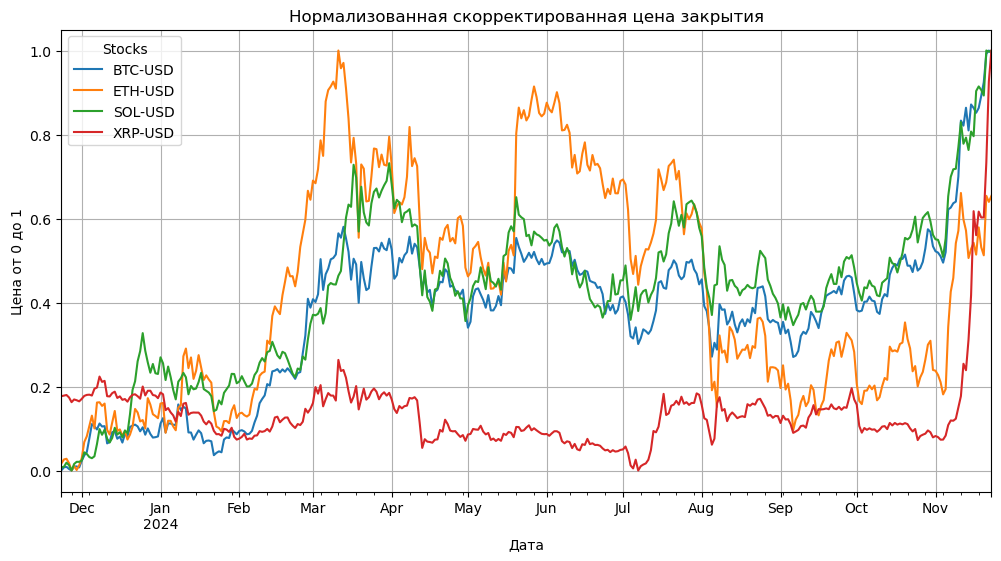

In [790]:
# Нормализуем цену

scaler = MinMaxScaler()
scaled_adj_close = pd.DataFrame(
    scaler.fit_transform(adj_close_crypto_df),
    columns=adj_close_crypto_df.columns,
    index=adj_close_crypto_df.index
)


# Plot the scaled data
scaled_adj_close.plot(figsize=(12, 6), title="Нормализованная скорректированная цена закрытия для криптовалюты")
plt.xlabel("Дата")
plt.ylabel("Цена от 0 до 1")
plt.grid(True)
plt.legend(title="Stocks", loc="upper left")
plt.show()

In [792]:
# Ищем выбросы
# Вычисление среднего и стандартного отклонения
mean = adj_close_crypto_df.mean()
std = adj_close_crypto_df.std()

# Границы для выбросов
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Фильтрация выбросов
outliers = adj_close_crypto_df[(adj_close_crypto_df < lower_bound) | (adj_close_crypto_df > upper_bound)]

outliers.isna().sum()

Date
BTC-USD    364
ETH-USD    367
SOL-USD    364
XRP-USD    359
dtype: int64

In [794]:
outliers

Date,BTC-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,
2023-11-23 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-11-24 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-11-25 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-11-26 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-11-27 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-11-19 00:00:00+00:00,NaN,NaN,NaN,1.101947
2024-11-20 00:00:00+00:00,NaN,NaN,NaN,1.102301
2024-11-21 00:00:00+00:00,98504.726562,NaN,257.065887,1.250352


In [ ]:
# Тут есть явные выбросы, после 21го ноября цены влзелетли и не укладываются в коно 6 стандартных отклонений от среднего